<a href="https://colab.research.google.com/github/Pandoraboy/datosJsonE2/blob/main/E2_MoisesA_NicolasJ_MauricioB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación 2

**Integrantes:**

+ Integrante 1: Moisés Araya Ramírez : moises.araya2001@alumnos.ubiobio.cl
+ Integrante 2: Nicolás Jiménez Villaroel : nicolas.jimenez2001@alumnos.ubiobio.cl
+ Integrante 3: Mauricio Burgos Riquelme : mauricio.burgos2101@alumnos.ubiobio.cl

**Fecha de Entrega:** 15 de Mayo 2025  
**Versión:** 1.0  

---


In [1]:
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/dataset_regresion.csv

--2025-05-15 18:45:48--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/dataset_regresion.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 510280 (498K) [text/plain]
Saving to: ‘dataset_regresion.csv’

dataset_regresion.c 100%[===================>] 498.32K  --.-KB/s    in 0.05s   

2025-05-15 18:45:49 (10.0 MB/s) - ‘dataset_regresion.csv’ saved [510280/510280]



# Descripción del negocio

✅ **Nombre del negocio:** PeopleGrow Solutions

✅ **Industria:** Consultoría de desarrollo organizacional y gestión de talento

✅ **Objetivo del negocio:** Optimizar las estrategias de compensación salarial para mejorar la retención del talento y la satisfacción laboral, considerando múltiples factores del perfil de los empleados.

**Antecedentes**

PeopleGrow Solutions trabaja con empresas que buscan alinear sus políticas salariales con indicadores clave como nivel educativo, experiencia laboral, satisfacción de los empleados y modalidad de trabajo (presencial/remoto). La empresa ha recolectado datos sobre empleados de distintas áreas para entender qué factores están más fuertemente asociados con la variación en los salarios mensuales.

# Objetivo del proyecto

Desarrollar un modelo de regresión que permita predecir el salario mensual de un empleado, basándose en perfil educativo, experiencia laboral, nivel de satisfacción, características del puesto y otras variables disponibles dentro del set de datos

Esto permitirá:

✅ Identificar brechas salariales entre departamentos o niveles educativos.

✅ Diseñar políticas de compensación equitativas y competitivas.

✅ Detectar factores críticos que contribuyen a una mayor remuneración.

✅ Simular escenarios de promoción o cambio de modalidad de trabajo y su impacto salarial.

# Pregunta clave

Esta pregunta debe encontrar la respuesta en la fase 2 de entendimiento de los datos

✔ ¿Existen diferencias salariales significativas entre empleados remotos y presenciales?

# Fase 2 - Entendimiento de los datos

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import json
import requests

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_log_error

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [3]:
data = pd.read_csv("dataset_regresion.csv")

In [4]:
data.shape

(10000, 9)

In [ ]:
data.columns

Index(['ID', 'Edad', 'Nivel_Educativo', 'Experiencia_Anios', 'Departamento',
       'Horas_Entrenamiento_Mensual', 'Satisfaccion_Laboral', 'Remoto',
       'Salario_Mensual'],
      dtype='object')

In [ ]:
data.head()

,ID,Edad,Nivel_Educativo,Experiencia_Anios,Departamento,Horas_Entrenamiento_Mensual,Satisfaccion_Laboral,Remoto,Salario_Mensual
0,1,56,Universitaria,38,Marketing,11,Alta,Sí,8230.50
1,2,46,Universitaria,23,TI,17,Muy Alta,No,6375.40
2,3,32,Técnica,13,TI,8,Media,No,4883.02
3,4,60,Secundaria,37,Finanzas,7,Alta,No,6739.09
4,5,25,Universitaria,7,Marketing,8,Alta,Sí,4729.60


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           10000 non-null  int64  
 1   Edad                         10000 non-null  int64  
 2   Nivel_Educativo              10000 non-null  object 
 3   Experiencia_Anios            10000 non-null  int64  
 4   Departamento                 10000 non-null  object 
 5   Horas_Entrenamiento_Mensual  10000 non-null  int64  
 6   Satisfaccion_Laboral         10000 non-null  object 
 7   Remoto                       10000 non-null  object 
 8   Salario_Mensual              10000 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 703.3+ KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10000.0,5000.500000,2886.895680,1.00,2500.7500,5000.500,7500.2500,10000.00
Edad,10000.0,41.557600,13.749581,18.00,30.0000,41.500,53.0000,65.00
Experiencia_Anios,10000.0,20.461600,13.239760,0.00,9.0000,20.000,32.0000,40.00
Horas_Entrenamiento_Mensual,10000.0,10.000000,3.183711,0.00,8.0000,10.000,12.0000,23.00
Salario_Mensual,10000.0,5764.693974,1659.896370,1773.68,4364.3675,5788.975,7177.2925,9641.94


In [5]:
df_final = data.drop(['ID'],axis=1)

In [ ]:
df_final.columns

Index(['Edad', 'Nivel_Educativo', 'Experiencia_Anios', 'Departamento',
       'Horas_Entrenamiento_Mensual', 'Satisfaccion_Laboral', 'Remoto',
       'Salario_Mensual'],
      dtype='object')

In [ ]:
df_final.query('Edad<Experiencia_Anios')

,Edad,Nivel_Educativo,Experiencia_Anios,Departamento,Horas_Entrenamiento_Mensual,Satisfaccion_Laboral,Remoto,Salario_Mensual


In [ ]:
df_final.query('Edad==0 or Edad<18')

,Edad,Nivel_Educativo,Experiencia_Anios,Departamento,Horas_Entrenamiento_Mensual,Satisfaccion_Laboral,Remoto,Salario_Mensual


In [ ]:
df_final.query('Salario_Mensual<0 or Salario_Mensual>100000 or Salario_Mensual==0')

,Edad,Nivel_Educativo,Experiencia_Anios,Departamento,Horas_Entrenamiento_Mensual,Satisfaccion_Laboral,Remoto,Salario_Mensual


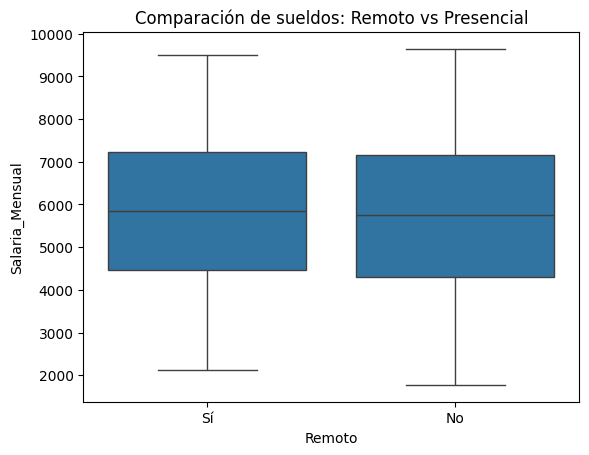

In [ ]:
sns.boxplot(x='Remoto', y='Salario_Mensual', data=df_final)
plt.xlabel('Remoto')
plt.ylabel('Salaria_Mensual')
plt.title('Comparación de sueldos: Remoto vs Presencial')
plt.show()


(5500.0, 6000.0)

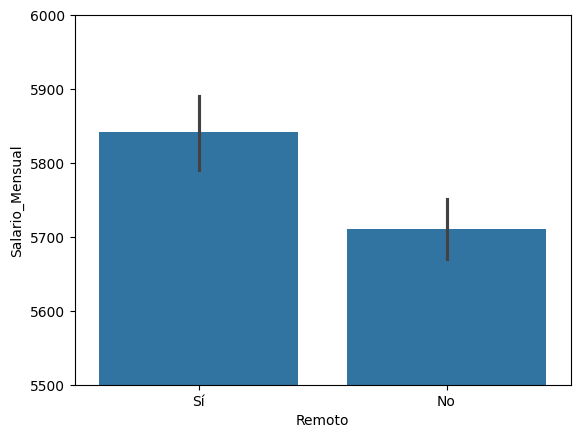

In [ ]:
sns.barplot(x='Remoto', y='Salario_Mensual', data=df_final)
plt.ylim(5500, 6000)

Se analizó si existían diferencias salariales entre empleados remotos y presenciales. Se comenzó realizando limpieza de datos, eliminando registros con edades o salarios no válidos, y posteriormente se exploró la variable Salario_Mensual en función de la modalidad Remoto.

Las visualizaciones (boxplot y barplot) sugieren que los empleados en modalidad remota tienden a tener un salario ligeramente mayor que los presenciales.

Lo que nos indica, respondiendo la pregunta inicial, que efectivamente si existen diferencias salariales significativas entre los trabajadores remotos y presenciales, favoreciendo a los trabajadores de modalidad remota.

# Fase 3 - Preparación de los datos




## Transformar Nivel_Educativo (ordinal)

In [6]:
nivel_educativo_orden = ['Secundaria', 'Técnica', 'Universitaria', 'Postgrado']

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[nivel_educativo_orden])
df_final['Nivel_Educativo_Ordinal'] = ordinal_encoder.fit_transform(df_final[['Nivel_Educativo']])

Se aplica codificación ordinal porque existe una jerarquía clara en los niveles educativos: Secundaria < Técnica < Universitaria < Postgrado.

##Transformar Satisfaccion_Laboral (ordinal)

In [7]:
satisfaccion_orden = ['Baja', 'Media', 'Alta', 'Muy Alta']
ordinal_encoder2 = OrdinalEncoder(categories=[satisfaccion_orden])
df_final['Satisfaccion_Laboral_Ordinal'] = ordinal_encoder2.fit_transform(df_final[['Satisfaccion_Laboral']])

Se trata como ordinal ya que refleja un orden subjetivo de satisfacción.

##Transformar Departamento (one-hot)

In [8]:
df_final = pd.get_dummies(df_final, columns=['Departamento'], prefix='Depto')


No existe un orden natural entre departamentos como TI, Finanzas o Marketing, por lo que se usa One Hot Encoding.

##Transformar Remoto (binario)

In [9]:
df_final['Remoto_Binario'] = df_final['Remoto'].map({'Sí': 1, 'No': 0})

##Se eliminan columnas originales ya codificadas

In [10]:
df_final = df_final.drop(['Nivel_Educativo', 'Satisfaccion_Laboral', 'Remoto'], axis=1)

##Resultado final

In [11]:
df_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Edad                          10000 non-null  int64  
 1   Experiencia_Anios             10000 non-null  int64  
 2   Horas_Entrenamiento_Mensual   10000 non-null  int64  
 3   Salario_Mensual               10000 non-null  float64
 4   Nivel_Educativo_Ordinal       10000 non-null  float64
 5   Satisfaccion_Laboral_Ordinal  10000 non-null  float64
 6   Depto_Finanzas                10000 non-null  bool   
 7   Depto_Marketing               10000 non-null  bool   
 8   Depto_Recursos Humanos        10000 non-null  bool   
 9   Depto_TI                      10000 non-null  bool   
 10  Depto_Ventas                  10000 non-null  bool   
 11  Remoto_Binario                10000 non-null  int64  
dtypes: bool(5), float64(3), int64(4)
memory usage: 595.8 KB


Confirmamos que todos nuestros datos son numéricos y nuestras variables categóricas fueron transformadas correctamente.

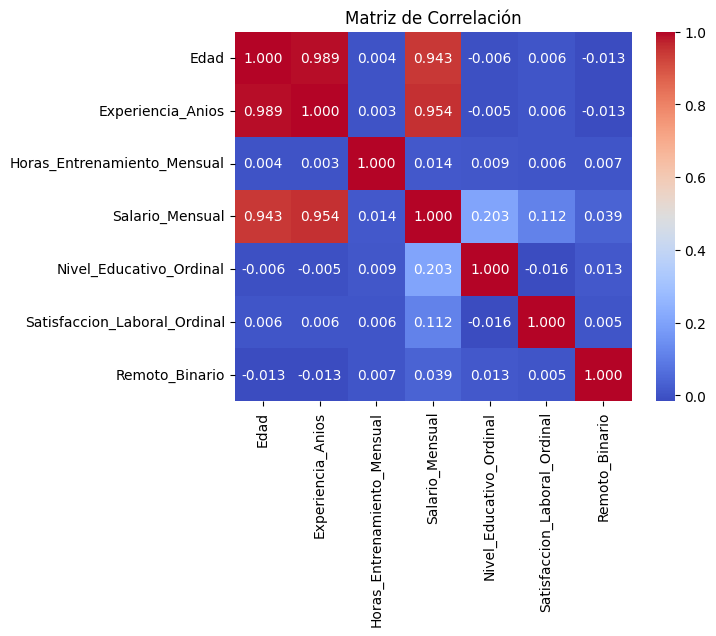

In [12]:
correlacionx = df_final.select_dtypes(include=["number"])

sns.heatmap(correlacionx.corr(), annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Matriz de Correlación")
plt.show()

# Fase 4 - Modelamiento

Escogimos las siguientes variables independientes para trabajar basados en los criterios de negocios del mercado actual y por las siguientes especificaciones:

- **Edad y Experiencia_Anios**: representan la trayectoria profesional del empleado.
- **Nivel_Educativo_Ordinal**: los estudios están estrechamente relacionados con el salario.
- **Satisfaccion_Laboral_Ordinal**: puede reflejar el compromiso del empleado, que impacta en su compensación.
- **Remoto_Binario**: permite evaluar si el trabajo remoto afecta la remuneración.
- **Depto_TI**: departamento clave en empresas modernas, normalmente asociado a sueldos más altos.

##LinearRegression

###Preparar datos para modelado

In [20]:
from sklearn.model_selection import train_test_split

y = df_final['Salario_Mensual']

#TODAS las variables
X_all = df_final.drop(['Salario_Mensual'], axis=1)

## VARIABLES SELECCIONADAS
selected_vars = ['Edad', 'Experiencia_Anios', 'Nivel_Educativo_Ordinal',
                 'Satisfaccion_Laboral_Ordinal', 'Remoto_Binario', 'Depto_TI']
X_sel = df_final[selected_vars]

X_train_all, X_test_all, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)
X_train_sel, X_test_sel, _, _ = train_test_split(X_sel, y, test_size=0.2, random_state=42)


En este bloque se crean las variables de entrada (x) y de salida (y) para los modelos. De igual forma separamos los datos de entrenamiento y prueba para evaluar que tan bien predice el modelo con datos nuevos, tanto como con todas las variables, como con las seleccionadas.

###Modelado del LinearRegression

In [21]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_log_error
y = df_final['Salario_Mensual']

#variables completas
X_all = df_final.drop(['Salario_Mensual'], axis=1)

#variables seleccionadas
selected_vars = ['Edad', 'Experiencia_Anios', 'Nivel_Educativo_Ordinal',
                 'Satisfaccion_Laboral_Ordinal', 'Remoto_Binario', 'Depto_TI']
X_sel = df_final[selected_vars]

#division en train-test para ambas versiones
X_train_all, X_test_all, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)
X_train_sel, X_test_sel, _, _ = train_test_split(X_sel, y, test_size=0.2, random_state=42)

# modelo con todas las variables
modelo_lr_all = LinearRegression()
modelo_lr_all.fit(X_train_all, y_train)

y_pred_train_all = modelo_lr_all.predict(X_train_all)
y_pred_all = modelo_lr_all.predict(X_test_all)

r2_train_all = r2_score(y_train, y_pred_train_all)
r2_test_all = r2_score(y_test, y_pred_all)
mae_all = mean_absolute_error(y_test, y_pred_all)
msle_all = mean_squared_log_error(y_test, y_pred_all)

#modelo con variables seleccionadas
modelo_lr_sel = LinearRegression()
modelo_lr_sel.fit(X_train_sel, y_train)

y_pred_train_sel = modelo_lr_sel.predict(X_train_sel)
y_pred_sel = modelo_lr_sel.predict(X_test_sel)

r2_train_sel = r2_score(y_train, y_pred_train_sel)
r2_test_sel = r2_score(y_test, y_pred_sel)
mae_sel = mean_absolute_error(y_test, y_pred_sel)
msle_sel = mean_squared_log_error(y_test, y_pred_sel)

resultados = {
    'Modelo': ['Linear Regression - Todas Variables', 'Linear Regression - Variables Seleccionadas'],
    'R2 Train': [r2_train_all, r2_train_sel],
    'R2 Test': [r2_test_all, r2_test_sel],
    'MAE': [mae_all, mae_sel],
    'MSLE': [msle_all, msle_sel],
    'Overfitting': [
        'Sí' if abs(r2_train_all - r2_test_all) > 0.1 else 'No',
        'Sí' if abs(r2_train_sel - r2_test_sel) > 0.1 else 'No'
    ]
}

tabla_resultados = pd.DataFrame(resultados)

# Mostrar la tabla con título
tabla_resultados.style.set_caption("Resultados Modelo Linear Regression")

,Modelo,R2 Train,R2 Test,MAE,MSLE,Overfitting
0,Linear Regression - Todas Variables,0.967127,0.969544,234.157696,0.003664,No
1,Linear Regression - Variables Seleccionadas,0.967050,0.969486,234.599501,0.003668,No


##Decision Tree Regresor

In [22]:
from sklearn.tree import DecisionTreeRegressor

# Modelo con TODAS las variables
modelo_dt_all = DecisionTreeRegressor(random_state=42)
modelo_dt_all.fit(X_train_all, y_train)

y_pred_train_dt_all = modelo_dt_all.predict(X_train_all)
y_pred_dt_all = modelo_dt_all.predict(X_test_all)

r2_train_dt_all = r2_score(y_train, y_pred_train_dt_all)
r2_test_dt_all = r2_score(y_test, y_pred_dt_all)
mae_dt_all = mean_absolute_error(y_test, y_pred_dt_all)
msle_dt_all = mean_squared_log_error(y_test, y_pred_dt_all)

# Modelo con VARIABLES SELECCIONADAS
modelo_dt_sel = DecisionTreeRegressor(random_state=42)
modelo_dt_sel.fit(X_train_sel, y_train)

y_pred_train_dt_sel = modelo_dt_sel.predict(X_train_sel)
y_pred_dt_sel = modelo_dt_sel.predict(X_test_sel)

r2_train_dt_sel = r2_score(y_train, y_pred_train_dt_sel)
r2_test_dt_sel = r2_score(y_test, y_pred_dt_sel)
mae_dt_sel = mean_absolute_error(y_test, y_pred_dt_sel)
msle_dt_sel = mean_squared_log_error(y_test, y_pred_dt_sel)

# Tabla de resultados
resultados_dt = {
    'Modelo': ['Decision Tree - Todas Variables', 'Decision Tree - Variables Seleccionadas'],
    'R2 Train': [r2_train_dt_all, r2_train_dt_sel],
    'R2 Test': [r2_test_dt_all, r2_test_dt_sel],
    'MAE': [mae_dt_all, mae_dt_sel],
    'MSLE': [msle_dt_all, msle_dt_sel],
    'Overfitting': [
        'Sí' if abs(r2_train_dt_all - r2_test_dt_all) > 0.1 else 'No',
        'Sí' if abs(r2_train_dt_sel - r2_test_dt_sel) > 0.1 else 'No'
    ]
}

tabla_resultados_dt = pd.DataFrame(resultados_dt)
tabla_resultados_dt.style.set_caption("Resultados Modelo Decision Tree")

,Modelo,R2 Train,R2 Test,MAE,MSLE,Overfitting
0,Decision Tree - Todas Variables,0.999569,0.928766,358.451180,0.008351,No
1,Decision Tree - Variables Seleccionadas,0.988942,0.941667,324.358112,0.006872,No


##RandomForest


In [23]:
from sklearn.ensemble import RandomForestRegressor

# Modelo con TODAS las variables
modelo_rf_all = RandomForestRegressor(random_state=42)
modelo_rf_all.fit(X_train_all, y_train)

y_pred_train_rf_all = modelo_rf_all.predict(X_train_all)
y_pred_rf_all = modelo_rf_all.predict(X_test_all)

r2_train_rf_all = r2_score(y_train, y_pred_train_rf_all)
r2_test_rf_all = r2_score(y_test, y_pred_rf_all)
mae_rf_all = mean_absolute_error(y_test, y_pred_rf_all)
msle_rf_all = mean_squared_log_error(y_test, y_pred_rf_all)

# Modelo con VARIABLES SELECCIONADAS
modelo_rf_sel = RandomForestRegressor(random_state=42)
modelo_rf_sel.fit(X_train_sel, y_train)

y_pred_train_rf_sel = modelo_rf_sel.predict(X_train_sel)
y_pred_rf_sel = modelo_rf_sel.predict(X_test_sel)

r2_train_rf_sel = r2_score(y_train, y_pred_train_rf_sel)
r2_test_rf_sel = r2_score(y_test, y_pred_rf_sel)
mae_rf_sel = mean_absolute_error(y_test, y_pred_rf_sel)
msle_rf_sel = mean_squared_log_error(y_test, y_pred_rf_sel)

# Tabla de resultados
resultados_rf = {
    'Modelo': ['Random Forest - Todas Variables', 'Random Forest - Variables Seleccionadas'],
    'R2 Train': [r2_train_rf_all, r2_train_rf_sel],
    'R2 Test': [r2_test_rf_all, r2_test_rf_sel],
    'MAE': [mae_rf_all, mae_rf_sel],
    'MSLE': [msle_rf_all, msle_rf_sel],
    'Overfitting': [
        'Sí' if abs(r2_train_rf_all - r2_test_rf_all) > 0.1 else 'No',
        'Sí' if abs(r2_train_rf_sel - r2_test_rf_sel) > 0.1 else 'No'
    ]
}

tabla_resultados_rf = pd.DataFrame(resultados_rf)
tabla_resultados_rf.style.set_caption("Resultados Modelo Random Forest")


,Modelo,R2 Train,R2 Test,MAE,MSLE,Overfitting
0,Random Forest - Todas Variables,0.993980,0.961809,264.004206,0.004633,No
1,Random Forest - Variables Seleccionadas,0.986020,0.959256,270.670464,0.004915,No


## Considerando la totalidad de características disponibles

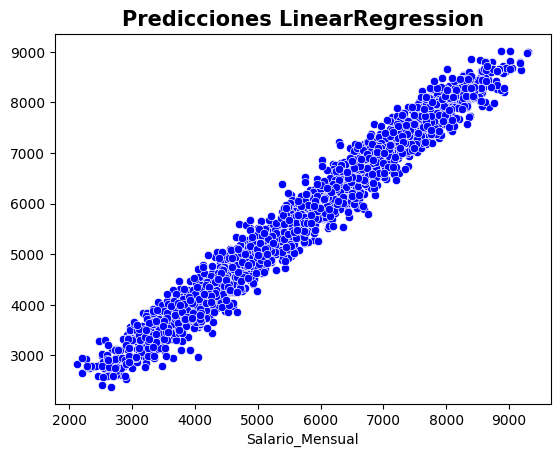

In [ ]:
# Realiza predicciones de modelo linearRegression con todas las variables
#Hay una linea 'imaginaria' diagonal que serian los salarios 'reales', los
#circulos que esten debajo de la linea indican que el modelo estimo el salario
#en menor cantidad que el real y si esta por encima es porque el modelo estimo
#el salario mas alto de lo que deberia ser.
import seaborn as sb

y_pred = modelo_lr_all.predict(X_test_all)
sb.scatterplot(x=y_test , y=y_pred, color="blue")
plt.title("Predicciones LinearRegression", fontsize=15, fontweight="bold");

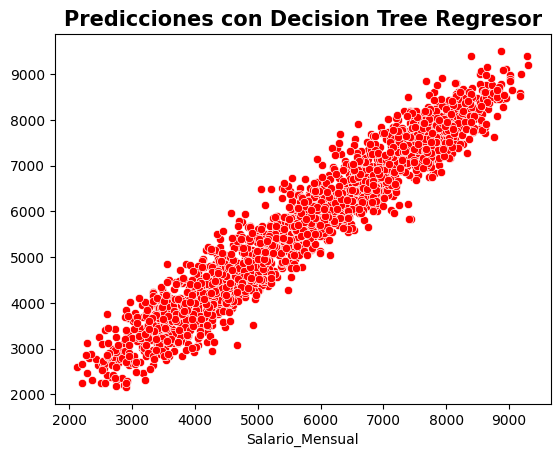

In [ ]:
# Se realizan predicciones de margen de error en salario calculado por modelo vs el real salario con DT y todas las variables
y_pred_tree = modelo_dt_all.predict(X_test_all)
sb.scatterplot(x=y_test , y=y_pred_tree, color="red")
plt.title("Predicciones con Decision Tree Regresor", fontsize=15, fontweight="bold");

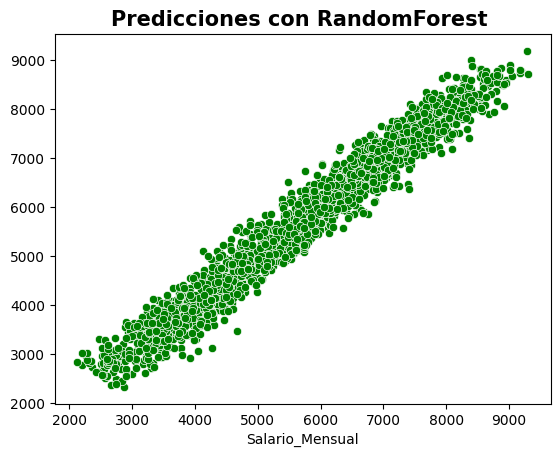

In [ ]:
#predicciones con RandomForest usando todas las variables
y_pred_rf = modelo_rf_all.predict(X_test_all)
sb.scatterplot(x=y_test , y=y_pred_rf, color="green")
plt.title("Predicciones con RandomForest ", fontsize=15, fontweight="bold");

## Con selección de características por parte del equipo

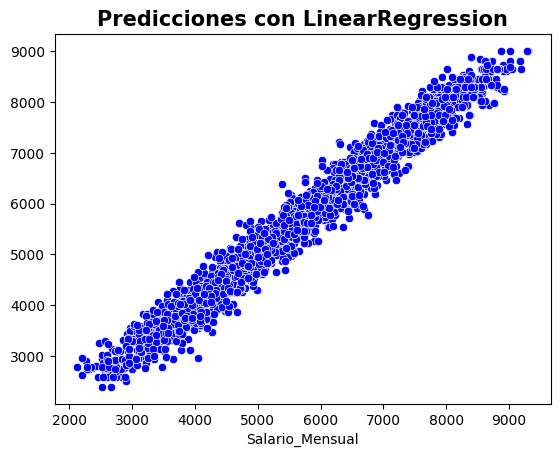

In [ ]:
# Realiza predicciones con DT y las variables seleccionadas
y_pred = modelo_lr_sel.predict(X_test_sel)
sb.scatterplot(x=y_test , y=y_pred, color="blue")
plt.title("Predicciones con LinearRegression", fontsize=15, fontweight="bold");

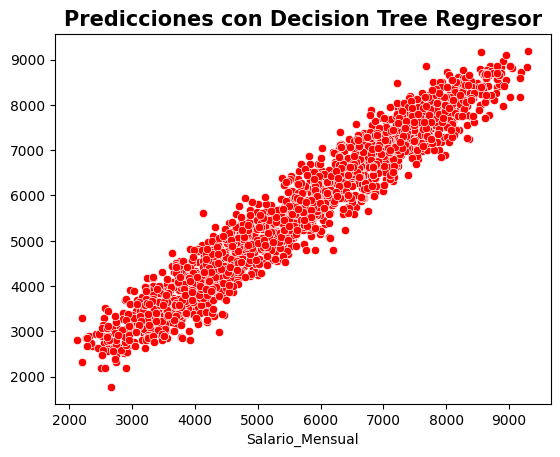

In [ ]:
# Realiza predicciones con DT y las variables seleccionadas
y_pred_tree = modelo_dt_sel.predict(X_test_sel)
sb.scatterplot(x=y_test , y=y_pred_tree, color="red")
plt.title("Predicciones con Decision Tree Regresor", fontsize=15, fontweight="bold");

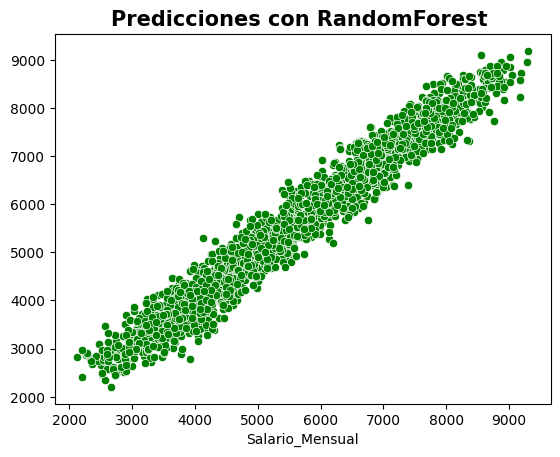

In [ ]:
#predicciones con RandomForest usando las variables elegidas
y_pred_rf = modelo_rf_sel.predict(X_test_sel)
sb.scatterplot(x=y_test , y=y_pred_rf, color="green")
plt.title("Predicciones con RandomForest ", fontsize=15, fontweight="bold");

# Fase 5 - Evaluación

## Carga de archivo JSON con datos completamente nuevos

In [25]:
response = requests.get('https://raw.githubusercontent.com/Pandoraboy/datosJsonE2/refs/heads/main/datosnuevos.json')
data = response.json()

# Convertir a DataFrame
df_nuevos = pd.DataFrame(data)

# Realizar predicción (usando modelo ya entrenado)
predicciones = modelo_lr_all.predict(df_nuevos)

# Agregar columna de predicción
df_nuevos['Prediccion_Salario_Mensual'] = predicciones

## Generación de JSON con las predicciones del mejor modelo

In [26]:
# Guardar en nuevo archivo .json
df_nuevos.to_json('predicciones_resultado.json', orient='records', indent=4)